In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv(r'D:\OneDrive - NITT\Custom_Download\Result_prediction.csv')

In [4]:
df

,Unnamed: 0,d1_spend,d3_spend,d7_spend,d14_spend,d30_spend,avg_p_1,count_p_1,p_4,p_5,avg_p_6,sum_p_6,count_p_7,avg_p_8,sum_p_8,count_p_8,avg_p_9,sum_p_9,count_p_9,count_p_10,count_p_11,count_p_12,avg_p_13,count_p_13,sum_p_13,len_p_14,count_p_15,count_p_20,sum_p_16,sum_p_17,...,c_45,c_25,c_2,c_65,c_1,c_12,c_31,c_28,c_29,c_67,c_21,c_71,ms_1,ms_6,ms_0,ms_8,ms_3,ms_7,ms_2,ms_12,ms_15,ms_16,ms_11,ms_5,ms_20,ms_26,ms_4,ms_25,ms_10,y_pred
0,0,14.000000,14.000000,14.000000,14.000000,14.000000,60.000000,1,0.00,0.0,10.0,10,1,5.00000,5.000000,1,0.000000,0.000000,1,0,1,9,0.0,0,0.0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.147286,0.252286,0.437286,0.437286,0.532286,60.440000,25,0.60,0.4,10.0,250,25,0.06400,1.600000,25,0.022400,0.560000,25,0,11,60,16.0,1,16.0,1,38,2107,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,0.005000,0.005000,0.005000,0.005000,0.005000,10.000000,1,1.00,1.0,10.0,10,1,0.05000,0.050000,1,0.010000,0.010000,1,0,0,1,0.0,0,0.0,0,3,115,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,6.319261,50.620786,62.150415,62.934954,64.623987,56.212525,345,0.50,0.5,10.0,3450,345,0.46971,162.050001,345,0.152870,52.740009,345,2,5,35,91.5,2,183.0,2,99,4,0,87,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.010274,0.010274,0.010274,0.010274,0.010274,73.453749,2,0.50,0.0,5.0,10,0,0.05000,0.100000,2,0.000000,0.000000,2,0,1,4,0.0,0,0.0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58453,58453,0.048704,0.048704,0.048704,0.048704,0.048704,43.664427,3,0.00,0.0,10.0,30,3,0.05000,0.150000,3,0.000000,0.000000,3,0,1,2,0.0,0,0.0,0,5,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58454,58454,0.046296,0.046296,0.046296,0.046296,0.046296,42.203248,1,0.00,0.0,5.0,5,0,0.05000,0.050000,1,0.000000,0.000000,1,0,1,2,0.0,0,0.0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58455,58455,0.050000,0.050000,0.050000,0.050000,0.050000,82.000000,1,0.00,0.0,10.0,10,1,0.05000,0.050000,1,0.000000,0.000000,1,0,1,5,0.0,0,0.0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58456,58456,0.000000,0.000000,0.000000,0.000000,0.055000,0.000000,0,0.00,0.0,0.0,0,0,0.00000,0.000000,0,0.000000,0.000000,0,0,0,4,0.0,0,0.0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
# df['y_pred'].value_counts()

In [6]:
df = df[df.y_pred != 0]
df = df.drop(columns = ['y_pred'])

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X= df.drop("d30_spend",axis=1).values
y= df[["d30_spend"]].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [55]:
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

In [56]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train_scaled)
y_pred_lasso = lasso.predict(X_test)

In [57]:
from sklearn.metrics import r2_score 
r2_lasso = r2_score(y_test_scaled, y_pred_lasso)
r2_lasso

0.0

In [58]:
from sklearn.metrics import mean_squared_error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lasso

45194842.03689358

In [59]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_lasso

6722.710914273614

In [62]:
y_test_scaled

array([[-0.20216725],
       [-0.18200261],
       [-0.20218001],
       ...,
       [-0.20218681],
       [-0.20115949],
       [-0.20218588]])

In [60]:
y_pred_lasso

array([1.96437565e-17, 1.96437565e-17, 1.96437565e-17, ...,
       1.96437565e-17, 1.96437565e-17, 1.96437565e-17])

In [16]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [18]:
# LinearExample.RData

In [19]:
# fit = glmnet(x, y, family="gaussian", nlambda=50, alpha=1)

In [34]:
X_train.shape

(2532, 108)

In [35]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 1478.5928221376241
MSE: 14656851.637908904
RMSE: 3828.426783668313
R2 Square 0.6624385266940849
__________________________________
Train set evaluation:
_____________________________________
MAE: 1097.3822652700476
MSE: 19220050.00122894
RMSE: 4384.067745967088
R2 Square 0.7769702117357269
__________________________________


In [ ]:
# Mape

In [50]:
y_test[:,0].shape

(1086,)

In [44]:
test_pred.shape

(1086,)

In [52]:
df1 = pd.DataFrame({'y_test':y_test[:,0],'y_pred':test_pred})
df1

,y_test,y_pred
0,0.152222,-497.945278
1,133.024468,-703.793746
2,0.068148,-520.518239
3,0.100000,-441.682982
4,493.502901,1423.071707
...,...,...
1081,5354.785880,10913.816191
1082,813.299380,109.191891
1083,0.023333,-618.273459
1084,6.792720,-584.174161


In [63]:
df1['mape'] = (df1['y_test']-df1['y_pred'])*100/df1['y_test']

In [66]:
df1['mape']

0       3.272173e+05
1       6.290709e+02
2       7.639040e+05
3       4.417830e+05
4      -1.883614e+02
            ...     
1081   -1.038142e+02
1082    8.657421e+01
1083    2.649843e+06
1084    8.700004e+03
1085    2.303780e+06
Name: mape, Length: 1086, dtype: float64

In [69]:
# sum(df.isna().sum())

0

In [33]:
test_pred

array([ -387.94798889,  -638.68244451, -1008.46705729, ...,
        -787.94945502,  -518.48781883,  -618.96231697])

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred= reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7689781799222477

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

3167.1629590563157

In [ ]:
from sklearn.linear_model import Lasso
scores=[]
for alpha in [0.01, 1.0,10.0,20.0,100.0]:
  lasso= Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_pred= lasso.predict(X_test)
  scores.append(lasso.score(X_test,y_test))
print(scores)

[0.7632010647667454, 0.7653242787301725, 0.7725602389841264, 0.774852494893109, 0.7771788066081622]


In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7689781799222477

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

regt= LassoCV()
reg.fit(X_train, y_train)

coef= pd.Series(reg.coef_,index = X.columns)

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
imp_coef= coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,10.0)
imp_coef.plot(kind="barh")
plt.titile("Feature importance using Lasso Model")

NameError: ignored

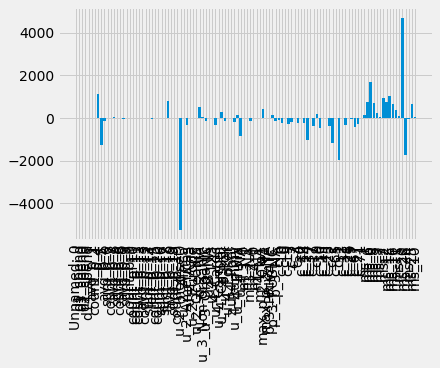

<Figure size 1800x720 with 0 Axes>

In [ ]:
from sklearn.linear_model import Lasso

X = df.drop("d30_spend",axis=1).values
y = df["d30_spend"].values
names = df.drop("d30_spend",axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.figure(figsize=(25,10))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
imp_coef= coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,10.0)
imp_coef.plot(kind="barh")
plt.titile("Feature importance using Lasso Model")

NameError: ignored

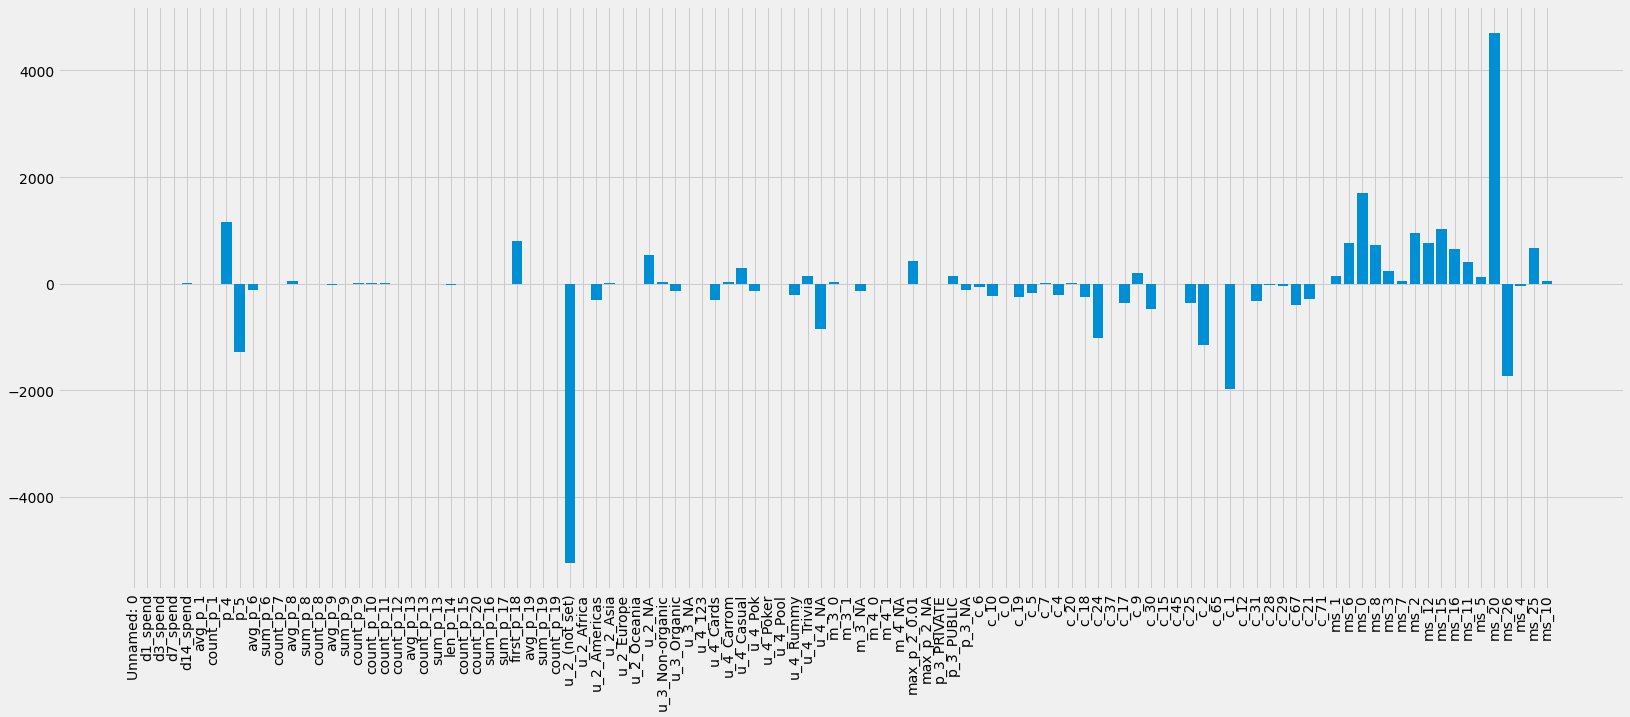

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()